In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
def harris_corner_detection_response(image, k=0.05):
    I = image.astype(np.float64)
    
    dGx = np.array([[-0.04, -0.96, 0.00, 0.96, 0.04]], dtype=np.float64)  # (normalized) derivative of gaussian in X direction
    dGy = dGx.T  # (normalized) derivative of gaussian in Y direction
    Ix = cv2.filter2D(I, -1, dGx)
    Iy = cv2.filter2D(I, -1, dGy)
    Ix2 = Ix * Ix
    Iy2 = Iy * Iy
    IxIy = Ix * Iy
    
    G = np.array([
        [0.0000, 0.0012, 0.0037, 0.0012, 0.0000],
        [0.0012, 0.0366, 0.1158, 0.0366, 0.0012],
        [0.0037, 0.1158, 0.3662, 0.1158, 0.0037],
        [0.0012, 0.0366, 0.1158, 0.0366, 0.0012],
        [0.0000, 0.0012, 0.0037, 0.0012, 0.0000]
                 ], dtype=np.float64)  # normalized gaussian kernel
    Sx2 = cv2.filter2D(Ix2, -1, G)
    Sy2 = cv2.filter2D(Iy2, -1, G)
    SxSy = cv2.filter2D(IxIy, -1, G)

    # calculate Harris Corner Detection Response
    detM = Sx2 * Sy2 - SxSy ** 2
    trM = Sx2 + Sy2
    R = detM - k * (trM) ** 2
    return R

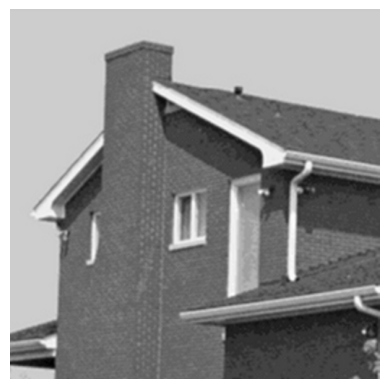

In [101]:
image = cv2.imread('assets/test1.png')  # Replace with the path to your image file
plt.imshow(image)
plt.axis('off')
plt.show()

# Convert the image from BGR (OpenCV default) to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [102]:
R = harris_corner_detection_response(gray_image, k=0.05)
print(R.max())
print(R.min())

3045628.67047194
-6919326.993311148


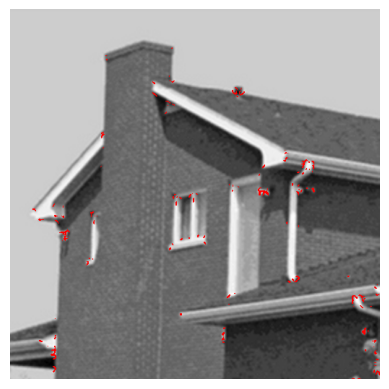

In [104]:
# Mark the points red where response is greater than threshold
threshold = 0.01 * R.max()
image[R > threshold = [255, 0, 0]

plt.imshow(image)
plt.axis('off')
plt.show()